# Load Kaggle Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install kaggle
! mkdir /root/.kaggle   
!cp /content/drive/MyDrive/Kaggle_API/kaggle.json /root/.kaggle  
! chmod 600 /root/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!kaggle datasets download -d jsrojas/ip-network-traffic-flows-labeled-with-87-apps

 98% 505M/514M [00:05<00:00, 76.8MB/s]
100% 514M/514M [00:05<00:00, 106MB/s] 


In [4]:
! unzip -q /content/ip-network-traffic-flows-labeled-with-87-apps.zip

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import socket, struct

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
filepath = "/content/Dataset-Unicauca-Version2-87Atts.csv"
df = pd.read_csv(filepath,nrows=500)
df.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,132,110414,6,6,6.000000,0.000000,4380,1187,2007.527273,768.481689,2.428355e+06,1.691453e+03,598.986842,816.061346,3880,1,45523,2167.761905,1319.384512,5988,698,41178,762.555556,1230.348220,5133,1,0,0,0,0,440,1100,4.832722e+02,1208.180480,6,4380,1417.333333,1121.579194,1.257940e+06,0,0,0,0,1,0,0,0,2,1435.74026,6.000000,2007.527273,440,0,0,0,0,0,0,22,132,55,110414,256,490,21,20,0,0,0,0,0,0,0,0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1,1,1,1.000000,0.000000,1,1,0,0.000000,0.000000,0,0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,0,9.00000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,490,-1,1,20,0,0,0,0,0,0,0,0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,674,0,337,0,224.666667,194.567041,0,0,0.000000,0.000000,6.740000e+08,3.000000e+06,0.500000,0.707107,1,0,1,0.500000,0.707107,1,0,0,0.000000,0.000000,0,0,1,0,0,0,96,0,3.000000e+06,0.000000,0,337,252.750000,168.500000,2.839225e+04,0,1,0,0,1,0,0,0,0,337.00000,224.666667,0.000000,96,0,0,0,0,0,0,3,674,0,0,888,-1,1,32,0,0,0,0,0,0,0,0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,1.843318e+04,72.333333,62.660461,110,0,0,0.000000,0.000000,0,0,107,53.500000,75.660426,107,0,0,0,0,0,32,96,4.608295e+03,13824.884793,0,0,0.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,3,0.00000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,3,0,888,490,0,32,0,0,0,0,0,0,0,0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,1076,0,529,6,215.200000,286.458898,0,0,0.000000,0.000000,1.378286e+04,6.404673e+01,19517.000000,25758.502350,54313,0,78068,19517.000000,25758.502350,54313,0,0,0.000000,0.000000,0,0,1,0,0,0,100,0,6.404673e+01,0.000000,6,529,267.500000,286.458898,8.205870e+04,0,1,0,0,1,0,0,0,0,321.00000,215.200000,0.000000,100,0,0,0,0,0,0,5,1076,0,0,253,-1,4,20,0,0,0,0,0,0,0,0,BENIGN,131,HTTP_PROXY


In [8]:
df.tail()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
495,179.1.4.238-10.200.7.195-443-41578-6,10.200.7.195,41578,179.1.4.238,443,6,26/04/201711:11:18,3158568,11,9,443,4642,242,0,40.272727,90.068963,2048,0,515.777778,739.400733,1.609907e+03,6.331983,166240.421053,671810.715215,2939125,0,3158568,315856.800000,9.220723e+05,2939125,0,175778,21972.250000,40715.831578,108217,0,0,0,0,0,360,296,3.482591,2.849393,0,2048,242.142857,530.830320,281780.828571,0,0,0,1,0,0,0,0,0,254.250000,40.272727,515.777778,360,0,0,0,0,0,0,11,443,9,4642,14600,243,2,32,0,0,0,0,0,0,0,0,BENIGN,124,YOUTUBE
496,216.58.202.225-10.200.7.195-443-44860-6,10.200.7.195,44860,216.58.202.225,443,6,26/04/201711:11:18,3314056,9,6,443,3204,242,0,49.222222,98.208678,2836,0,534.000000,1132.891522,1.100464e+03,4.526176,236718.285714,768028.390562,2898650,0,3314056,414257.000000,1.005708e+06,2898650,0,285810,57162.000000,78049.599784,145316,0,0,0,0,0,296,200,2.715705,1.810470,0,2836,227.937500,702.178939,493055.262500,0,0,0,1,0,0,0,0,0,243.133333,49.222222,534.000000,296,0,0,0,0,0,0,9,443,6,3204,14600,349,2,32,0,0,0,0,0,0,0,0,BENIGN,124,YOUTUBE
497,192.168.42.31-10.200.7.5-52688-3128-6,192.168.42.31,52688,10.200.7.5,3128,6,26/04/201711:11:19,2092468,15,72,2050,13721,1171,0,136.666667,297.915536,2048,0,190.569444,468.818558,7.537033e+03,41.577697,24331.023256,194557.426581,1804850,0,2092468,149462.000000,4.880467e+05,1842734,153,287516,4049.521127,11991.433872,60241,0,0,0,0,0,312,1500,7.168568,34.409128,0,2048,179.215909,440.953211,194439.734457,0,0,0,1,0,0,0,0,4,181.275862,136.666667,190.569444,312,0,0,0,0,0,0,15,2050,72,13721,8192,324,14,20,0,0,0,0,0,0,0,0,BENIGN,126,GOOGLE
498,192.168.42.31-10.200.7.5-52689-3128-6,192.168.42.31,52689,10.200.7.5,3128,6,26/04/201711:11:21,465618,20,99,3792,22220,1460,0,189.600000,359.722759,2920,0,224.444444,521.591134,5.586554e+04,255.574312,3945.915254,17280.930173,152407,0,465618,24506.210526,4.059871e+04,153744,67,436240,4451.428571,18770.455695,152407,0,0,0,0,0,412,2040,42.953666,212.620646,0,2920,216.766667,495.253177,245275.709804,0,0,0,1,0,0,0,0,4,218.588235,189.600000,224.444444,412,0,0,0,0,0,0,20,3792,99,22220,8192,397,19,20,0,0,0,0,0,0,0,0,BENIGN,126,GOOGLE
499,192.168.42.31-10.200.7.5-52688-3128-6,10.200.7.5,3128,192.168.42.31,52688,6,26/04/201711:11:21,7,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,1.714286e+06,285714.285714,7.000000,0.000000,7,7,7,7.000000,0.000000e+00,7,7,0,0.000000,0.000000,0,0,0,0,0,0,40,0,285714.285714,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,324,-1,1,20,0,0,0,0,0,0,0,0,BENIGN,7,HTTP


In [9]:
# Function that changes IP addresses into numbers

def ip2int(ip):
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]

In [10]:
# Converting IP addresses into numbers
df['Source.IP'] = df['Source.IP'].apply(ip2int)
df['Destination.IP'] = df['Destination.IP'].apply(ip2int)

In [11]:
# Checking if any value in the dataframe is null
df.isnull().values.any()

False

In [12]:
# Checking types of values
print(df.dtypes)

Flow.ID                         object
Source.IP                        int64
Source.Port                      int64
Destination.IP                   int64
Destination.Port                 int64
Protocol                         int64
Timestamp                       object
Flow.Duration                    int64
Total.Fwd.Packets                int64
Total.Backward.Packets           int64
Total.Length.of.Fwd.Packets      int64
Total.Length.of.Bwd.Packets      int64
Fwd.Packet.Length.Max            int64
Fwd.Packet.Length.Min            int64
Fwd.Packet.Length.Mean         float64
Fwd.Packet.Length.Std          float64
Bwd.Packet.Length.Max            int64
Bwd.Packet.Length.Min            int64
Bwd.Packet.Length.Mean         float64
Bwd.Packet.Length.Std          float64
Flow.Bytes.s                   float64
Flow.Packets.s                 float64
Flow.IAT.Mean                  float64
Flow.IAT.Std                   float64
Flow.IAT.Max                     int64
Flow.IAT.Min             

In [13]:
# Checking columns that have only one unique value
df.columns[df.nunique() <= 1]

Index(['Protocol', 'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags',
       'RST.Flag.Count', 'CWE.Flag.Count', 'ECE.Flag.Count',
       'Fwd.Avg.Bytes.Bulk', 'Fwd.Avg.Packets.Bulk', 'Fwd.Avg.Bulk.Rate',
       'Bwd.Avg.Bytes.Bulk', 'Bwd.Avg.Packets.Bulk', 'Bwd.Avg.Bulk.Rate',
       'Active.Mean', 'Active.Std', 'Active.Max', 'Active.Min', 'Idle.Mean',
       'Idle.Std', 'Idle.Max', 'Idle.Min', 'Label'],
      dtype='object')

In [14]:
df.pop('Timestamp')


0      26/04/201711:11:17
1      26/04/201711:11:17
2      26/04/201711:11:17
3      26/04/201711:11:17
4      26/04/201711:11:17
5      26/04/201711:11:17
6      26/04/201711:11:17
7      26/04/201711:11:17
8      26/04/201711:11:17
9      26/04/201711:11:17
10     26/04/201711:11:17
11     26/04/201711:11:17
12     26/04/201711:11:17
13     26/04/201711:11:17
14     26/04/201711:11:17
15     26/04/201711:11:17
16     26/04/201711:11:17
17     26/04/201711:11:17
18     26/04/201711:11:17
19     26/04/201711:11:17
20     26/04/201711:11:17
21     26/04/201711:11:17
22     26/04/201711:11:17
23     26/04/201711:11:17
24     26/04/201711:11:17
25     26/04/201711:11:17
26     26/04/201711:11:17
27     26/04/201711:11:17
28     26/04/201711:11:17
29     26/04/201711:11:17
30     26/04/201711:11:17
31     26/04/201711:11:17
32     26/04/201711:11:17
33     26/04/201711:11:17
34     26/04/201711:11:17
35     26/04/201711:11:17
36     26/04/201711:11:17
37     26/04/201711:11:17
38     26/04

In [15]:
df.pop('Flow.ID')


0           172.19.1.46-10.200.7.7-52422-3128-6
1           172.19.1.46-10.200.7.7-52422-3128-6
2          10.200.7.217-50.31.185.39-38848-80-6
3          10.200.7.217-50.31.185.39-38848-80-6
4         192.168.72.43-10.200.7.7-55961-3128-6
5           172.19.1.56-10.200.7.6-50004-3128-6
6         192.168.72.43-10.200.7.7-55963-3128-6
7         192.168.10.47-10.200.7.6-51848-3128-6
8        10.200.7.217-68.67.178.197-57300-443-6
9         192.168.72.43-10.200.7.7-55977-3128-6
10       192.168.180.51-10.200.7.4-57740-3128-6
11       192.168.180.51-10.200.7.4-57740-3128-6
12       192.168.180.51-10.200.7.4-57740-3128-6
13       192.168.180.51-10.200.7.4-57740-3128-6
14          172.19.1.45-10.200.7.6-50227-3128-6
15      212.124.124.94-10.200.7.194-443-44447-6
16       192.168.180.51-10.200.7.4-57741-3128-6
17       192.168.180.51-10.200.7.4-57741-3128-6
18       192.168.180.51-10.200.7.4-57741-3128-6
19       172.217.30.13-10.200.7.217-443-41526-6
20       172.217.30.13-10.200.7.217-443-

In [16]:
print(df.dtypes)

Source.IP                        int64
Source.Port                      int64
Destination.IP                   int64
Destination.Port                 int64
Protocol                         int64
Flow.Duration                    int64
Total.Fwd.Packets                int64
Total.Backward.Packets           int64
Total.Length.of.Fwd.Packets      int64
Total.Length.of.Bwd.Packets      int64
Fwd.Packet.Length.Max            int64
Fwd.Packet.Length.Min            int64
Fwd.Packet.Length.Mean         float64
Fwd.Packet.Length.Std          float64
Bwd.Packet.Length.Max            int64
Bwd.Packet.Length.Min            int64
Bwd.Packet.Length.Mean         float64
Bwd.Packet.Length.Std          float64
Flow.Bytes.s                   float64
Flow.Packets.s                 float64
Flow.IAT.Mean                  float64
Flow.IAT.Std                   float64
Flow.IAT.Max                     int64
Flow.IAT.Min                     int64
Fwd.IAT.Total                    int64
Fwd.IAT.Mean             

In [17]:
# Checking occurance of each application
df['ProtocolName'].value_counts()

HTTP              184
SSL                76
HTTP_PROXY         68
HTTP_CONNECT       68
GOOGLE             58
YOUTUBE            30
CONTENT_FLASH       5
FACEBOOK            4
MICROSOFT           3
WINDOWS_UPDATE      2
DROPBOX             1
AMAZON              1
Name: ProtocolName, dtype: int64

In [18]:
# Features that will be removed from dataset because they have low occurances of records in dataset
feats_toDelete = df['ProtocolName'].value_counts()[-25:].index
feats_toDelete

Index(['HTTP', 'SSL', 'HTTP_PROXY', 'HTTP_CONNECT', 'GOOGLE', 'YOUTUBE',
       'CONTENT_FLASH', 'FACEBOOK', 'MICROSOFT', 'WINDOWS_UPDATE', 'DROPBOX',
       'AMAZON'],
      dtype='object')

In [ ]:
# Plot the number of records for individual applications
target_count = df['ProtocolName'].value_counts()
plt.figure(figsize=(16,10))
target_count.plot(kind='bar', title='Occurance');

In [31]:
# Removal of the applications saved in feats_toDelete var because they occur in a small amount of records and do not have a major impact on the model
df = df[~df.ProtocolName.isin(feats_toDelete)]
#df = df[~df.]

In [ ]:
# Plot the number of records for individual applications one more time after some application removal
target_count2 = df['ProtocolName'].value_counts()
plt.figure(figsize=(16,10))
target_count2.plot(kind='bar', title='Occurance');

In [ ]:
print(feats)

['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count', 'PSH.

In [19]:
feats = [x for x in df.columns if x != 'ProtocolName']
X = df[feats]
Y = df['ProtocolName']

In [20]:
# Convert application names to numbers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [21]:
print(sorted(Counter(Y).items()))

[('AMAZON', 1), ('CONTENT_FLASH', 5), ('DROPBOX', 1), ('FACEBOOK', 4), ('GOOGLE', 58), ('HTTP', 184), ('HTTP_CONNECT', 68), ('HTTP_PROXY', 68), ('MICROSOFT', 3), ('SSL', 76), ('WINDOWS_UPDATE', 2), ('YOUTUBE', 30)]


In [ ]:
print(sorted(Counter(encoded_Y).items()))

[(0, 8099), (1, 1567), (2, 209), (3, 2505), (4, 433), (5, 189), (6, 3247), (7, 3588), (8, 4456), (9, 125059), (10, 111493), (11, 46807), (12, 69216), (13, 259), (14, 10693), (15, 1842), (16, 393), (17, 374), (18, 738), (19, 3916), (20, 67804), (21, 2635), (22, 408), (23, 546), (24, 6683), (25, 3462), (26, 22297)]


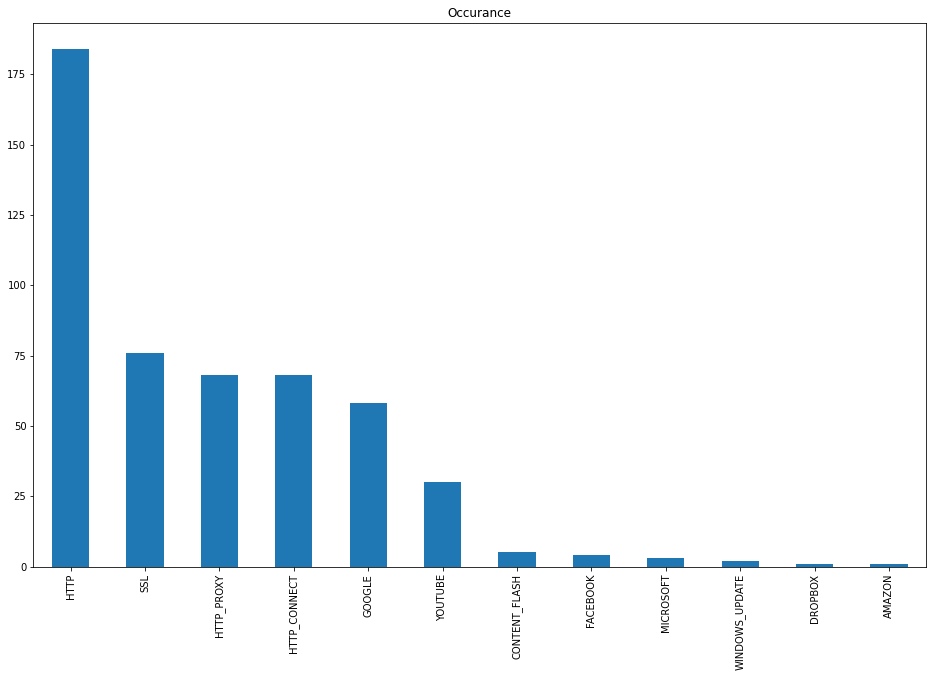

In [22]:
# Plot the number of records for individual applications one more time after some application removal
target_count2 = df['ProtocolName'].value_counts()
plt.figure(figsize=(16,10))
target_count2.plot(kind='bar', title='Occurance');
     

In [26]:

#feats = [x for x in df.columns if x != "Label"]
#X = df[feats].astype(float)
Y = df['Label']
     

In [38]:
labelencoder = LabelEncoder()
#encoder.fit(df.ProtocolName)
#encoded_df = encoder.transform(df[])
labelencoder.fit_transform(df['ProtocolName'])

array([ 7,  7,  5,  5,  7,  7,  7,  6,  9,  4,  7,  7,  7,  7,  7,  9,  5,
        5,  5,  4,  4,  5,  5,  5,  4,  5,  9,  7,  7,  6,  5,  5,  5,  5,
        5,  7, 11, 11, 11,  6,  7,  5,  5,  6,  5,  9,  5,  7,  9,  9,  6,
        6,  7,  5,  7,  5,  5,  5,  5,  5,  5,  5,  7,  5,  5,  6,  5,  5,
        7,  7,  7,  7,  6,  5,  9,  5,  5,  7,  5,  9,  7,  9,  5, 11, 11,
       11,  5, 11,  5,  5,  5, 11, 11,  5,  5, 11, 11,  5,  5,  5,  3,  1,
        4,  6,  5,  5,  7,  4,  7,  4,  4,  6,  6,  9,  5,  5, 11,  4,  7,
        9,  9,  6,  9,  5,  5,  4,  5,  9,  9,  6,  6,  9,  9,  6,  5,  5,
        5,  5,  9,  6,  5,  9,  9,  6,  5,  6,  9,  9,  6,  5,  5,  6,  9,
        5,  7,  5,  6,  5,  9,  5,  5,  5,  4,  9,  9,  9,  9,  6,  7,  6,
        7,  6,  4,  4,  5,  4,  6,  9,  5,  5,  5,  5,  5,  4,  6,  6,  9,
        6,  5,  9,  6,  5,  5,  5,  6,  1,  9,  6,  7,  6,  9,  9,  9,  6,
        5,  9,  6,  5,  5,  5,  6,  9,  6,  6,  9,  6,  5,  9,  9,  6,  5,
        5,  5,  9,  4,  9

In [47]:
print(df)

      Source.IP  Source.Port  Destination.IP  Destination.Port  Protocol  \
0    2886926638        52422       180881159              3128         6   
1     180881159         3128      2886926638             52422         6   
2     840939815           80       180881369             38848         6   
3     840939815           80       180881369             38848         6   
4    3232253995        55961       180881159              3128         6   
5     180881158         3128      2886926648             50004         6   
6    3232253995        55963       180881159              3128         6   
7    3232238127        51848       180881158              3128         6   
8    1145287365          443       180881369             57300         6   
9    3232253995        55977       180881159              3128         6   
10    180881156         3128      3232281651             57740         6   
11    180881156         3128      3232281651             57740         6   
12    180881

In [ ]:
print(df.dtypes)

In [27]:
# Convert application names to numbers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [28]:
print(sorted(Counter(Y).items()))
     


[('BENIGN', 500)]


In [29]:

print(sorted(Counter(encoded_Y).items()))

[(0, 500)]


In [31]:
print(encoded_Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [40]:

dict_nearMiss = {
"GOOGLE":            10000,
"HTTP":              10000,
"HTTP_PROXY":        10000,
"SSL":               10000,
"HTTP_CONNECT":      10000,
"YOUTUBE":           10000,
"AMAZON":             10000,
"MICROSOFT":          10000,
"GMAIL":              10000,
"WINDOWS_UPDATE":     10000,
"SKYPE":              10000,
"FACEBOOK":           10000,
"DROPBOX":            10000,
"YAHOO":              10000,
"TWITTER":            10000,
"CLOUDFLARE":         10000,
"MSN":                10000,
}

In [42]:
dict_smote = { "CONTENT_FLASH":       10000,
"APPLE":               10000,
"OFFICE_365":        10000,
"WHATSAPP":            10000,
"INSTAGRAM":          10000,
"WIKIPEDIA":           10000,
"MS_ONE_DRIVE":        10000,
"DNS":                 10000,
"IP_ICMP":             10000,
"NETFLIX":             10000,
"APPLE_ITUNES":        10000,
"SPOTIFY":             10000,
"APPLE_ICLOUD":        10000,
"EBAY":               10000,
"SSL_NO_CERT":          10000,
"GOOGLE_MAPS":          10000,
"EASYTAXI":             10000,
"TEAMVIEWER":           10000,
"HTTP_DOWNLOAD":        10000,
"MQTT":                 10000,
"TOR":                  10000,
"FTP_DATA":             10000,
"UBUNTUONE":            10000,
"NTP":                  10000,
"SSH": 10000}
print(dict_smote)

{'CONTENT_FLASH': 10000, 'APPLE': 10000, 'OFFICE_365': 10000, 'WHATSAPP': 10000, 'INSTAGRAM': 10000, 'WIKIPEDIA': 10000, 'MS_ONE_DRIVE': 10000, 'DNS': 10000, 'IP_ICMP': 10000, 'NETFLIX': 10000, 'APPLE_ITUNES': 10000, 'SPOTIFY': 10000, 'APPLE_ICLOUD': 10000, 'EBAY': 10000, 'SSL_NO_CERT': 10000, 'GOOGLE_MAPS': 10000, 'EASYTAXI': 10000, 'TEAMVIEWER': 10000, 'HTTP_DOWNLOAD': 10000, 'MQTT': 10000, 'TOR': 10000, 'FTP_DATA': 10000, 'UBUNTUONE': 10000, 'NTP': 10000, 'SSH': 10000}


In [43]:
# getting rid of the problem of unbalanced data set
pipe = make_pipeline(
    SMOTE(sampling_strategy=dict_smote),
    NearMiss(sampling_strategy=dict_nearMiss)
)
    

In [44]:

X_resampled, y_resampled = pipe.fit_resample(X, Y)
     

ValueError: ignored

In [ ]:
print("Shape pierwotnego pliku " + str(df.shape))
print("Shape X " + str(X.shape))
print("Shape X_resampled" + str(X_resampled.shape))
print("Shape Y " + str(Y.shape))
print("Shape y_resampled" + str(y_resampled.shape))
     


In [ ]:
# creating new dataset
new_dataframe = pd.DataFrame(data = X_resampled, columns = feats) 

In [ ]:

new_dataframe['ProtocolName'] = y_resampled
     

In [ ]:
new_dataframe.describe()

In [ ]:
new_dataframe.to_csv('KaggleImbalanced.csv', index=False)